# Demo Geolocation
- https://latitudelongitude.org/vn/

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Đọc file dữ liệu ranh giới các tỉnh thành ở VN và quan sát dữ liệu
provinces = gpd.read_file('data/province data.geojson')
provinces.head(10)

,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.0811 8.57754, 106.08069 8...."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.7442 22.73519, 105.74624 2..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."
5,6,AD01,Bắc Ninh,"MULTIPOLYGON (((106.03246 21.22488, 106.03217 ..."
6,7,AD01,Bến Tre,"MULTIPOLYGON (((106.42508 10.32019, 106.44474 ..."
7,8,AD01,Bình Định,"MULTIPOLYGON (((109.36862 13.5916, 109.36824 1..."
8,9,AD01,Bình Dương,"MULTIPOLYGON (((106.43608 11.5021, 106.44327 1..."
9,10,AD01,Bình Phước,"MULTIPOLYGON (((107.2194 12.20223, 107.22417 1..."


In [3]:
provinces.shape

(63, 4)

In [7]:
# Đọc file dữ liệu các tỉnh thành ở VN và quan sát dữ liệu
data = pd.read_excel('data/province data.xlsx') # số liệu thiếu lat và long

In [8]:
data.head(10)

,province,id,value,area,pop,pop.area,lat,long
0,An Giang,1,29.757870,3536.7,2155.3,609,NaN,NaN
1,Bạc Liêu,2,57.377857,2468.7,876.8,355,9.29414,105.72776
2,Bắc Giang,3,53.084348,3849.7,1593.2,414,21.27307,106.19460
3,Bắc Kạn,4,23.989343,4859.4,303.1,62,22.14701,105.83481
4,Bắc Ninh,5,24.026561,822.7,1114.0,1354,21.18608,106.07631
5,Bến Tre,6,46.193719,2359.5,1262.0,535,10.24147,106.37585
6,Bà Rịa - Vũng Tàu,7,54.703219,1989.5,1052.8,529,NaN,NaN
7,Bình Định,8,39.956721,6050.6,1510.4,250,NaN,NaN
8,Bình Dương,9,34.434965,2694.4,1802.5,669,NaN,NaN
9,Bình Phước,10,52.766220,6871.5,921.8,134,NaN,NaN


In [6]:
# cập nhật lat và long cho số liệu
import math
for i,r in data.iterrows():
    t = r.province # duyet tung tinh, lay ten tinh
    p = provinces[provinces['ten_tinh']==t] # xac dinh polygon cua tinh
    lat, long = p.geometry.centroid.y, p.geometry.centroid.x
    if math.isnan(r['lat']) or math.isnan(r['long']):
        data.loc[data['province']==t,'lat']= lat
        data.loc[data['province']==t,'long']= long

In [7]:
data.head(10)

,province,id,value,area,pop,pop.area,lat,long
0,An Giang,1,29.757870,3536.7,2155.3,609,10.513334,105.180490
1,Bạc Liêu,2,57.377857,2468.7,876.8,355,9.294140,105.727760
2,Bắc Giang,3,53.084348,3849.7,1593.2,414,21.273070,106.194600
3,Bắc Kạn,4,23.989343,4859.4,303.1,62,22.147010,105.834810
4,Bắc Ninh,5,24.026561,822.7,1114.0,1354,21.186080,106.076310
5,Bến Tre,6,46.193719,2359.5,1262.0,535,10.241470,106.375850
6,Bà Rịa - Vũng Tàu,7,54.703219,1989.5,1052.8,529,NaN,NaN
7,Bình Định,8,39.956721,6050.6,1510.4,250,14.124843,108.946536
8,Bình Dương,9,34.434965,2694.4,1802.5,669,11.218115,106.656251
9,Bình Phước,10,52.766220,6871.5,921.8,134,11.756773,106.906611


In [9]:
data['lat'].isnull().sum()

40

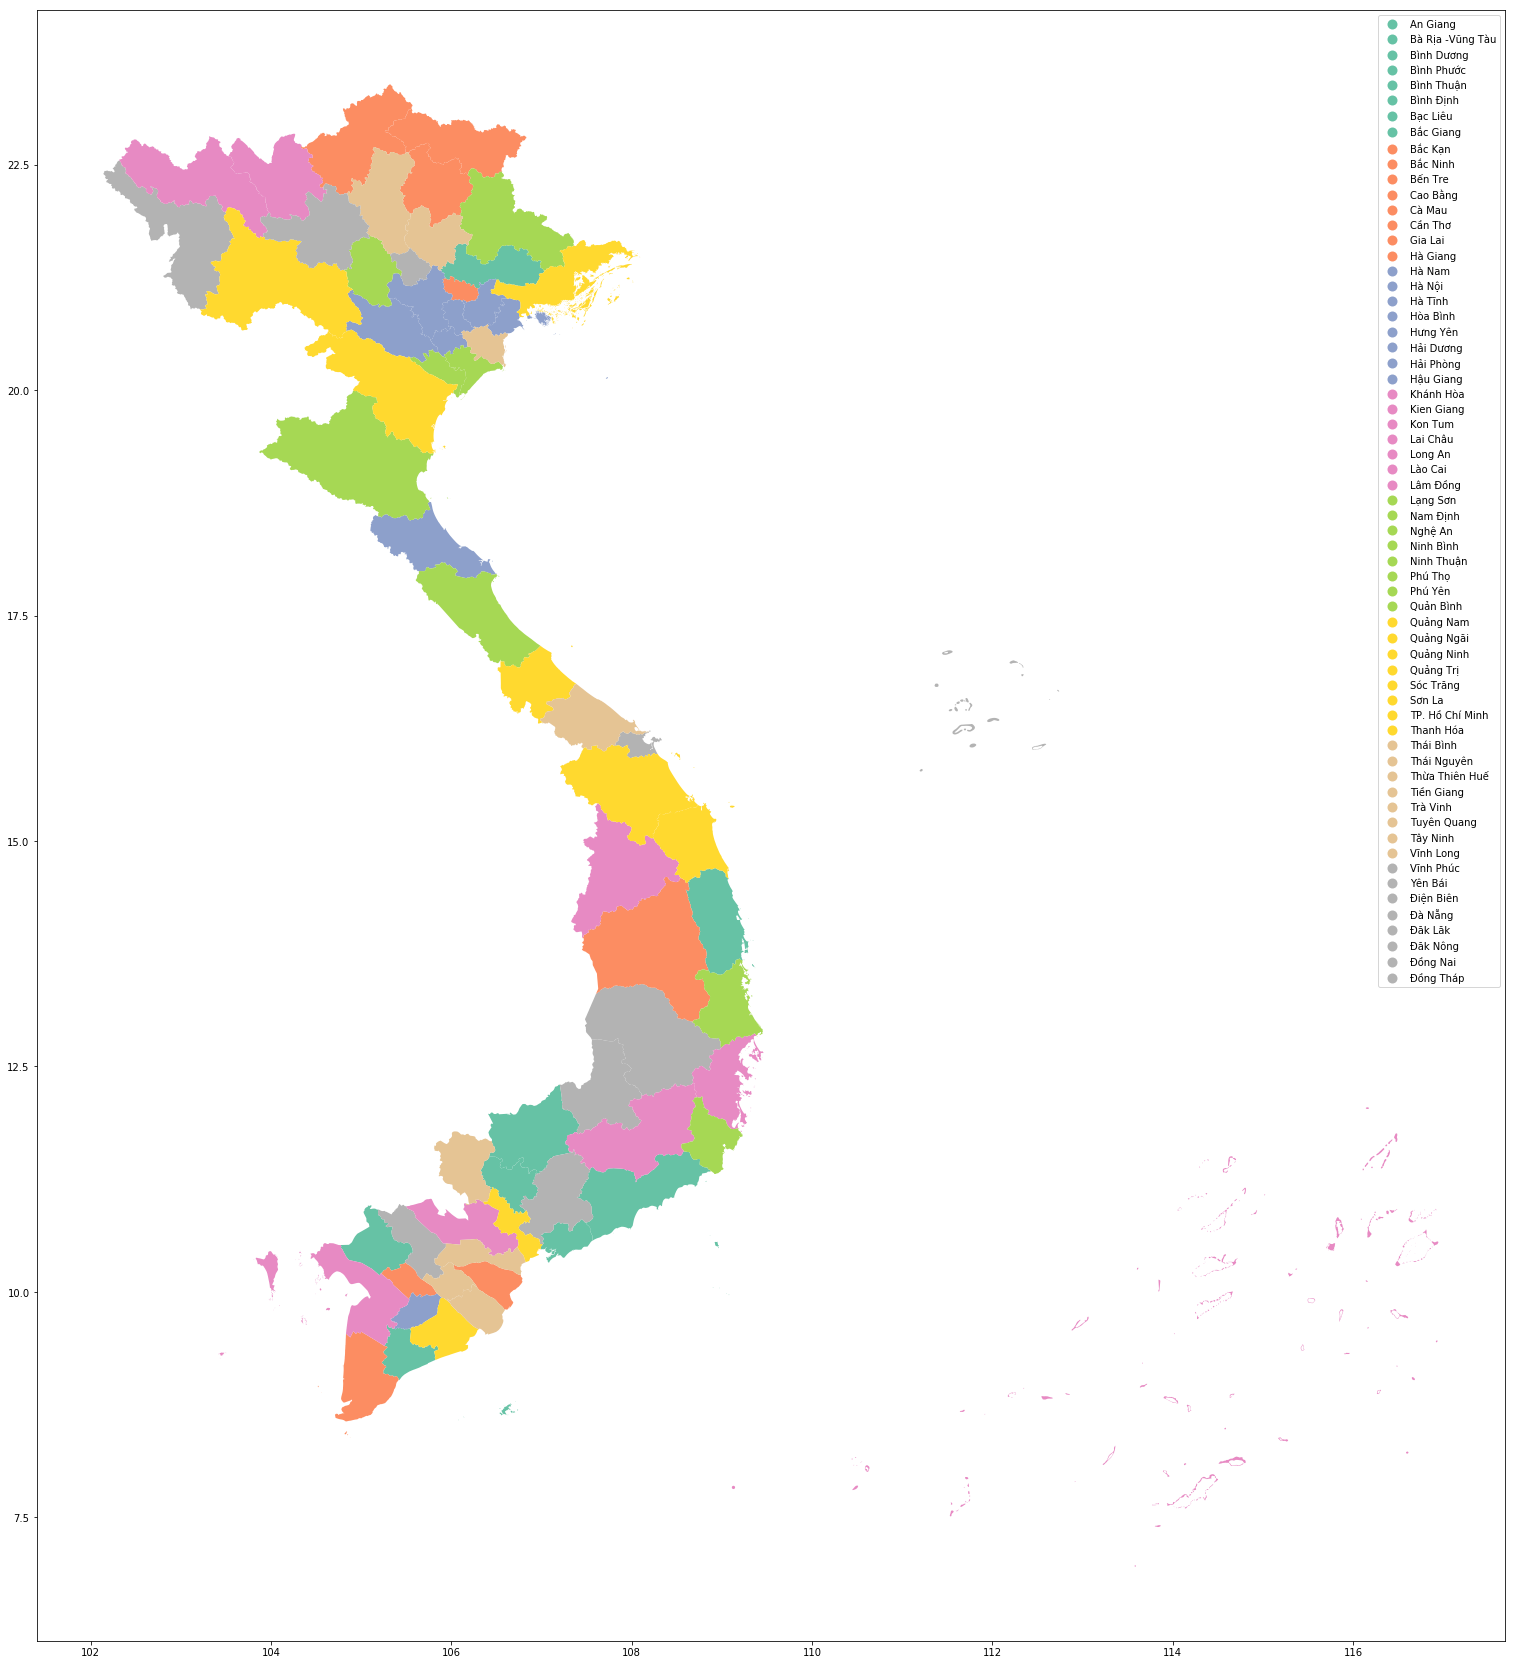

In [10]:
provinces.plot(column = 'ten_tinh', cmap = 'Set2', figsize=(30,30), legend=True);

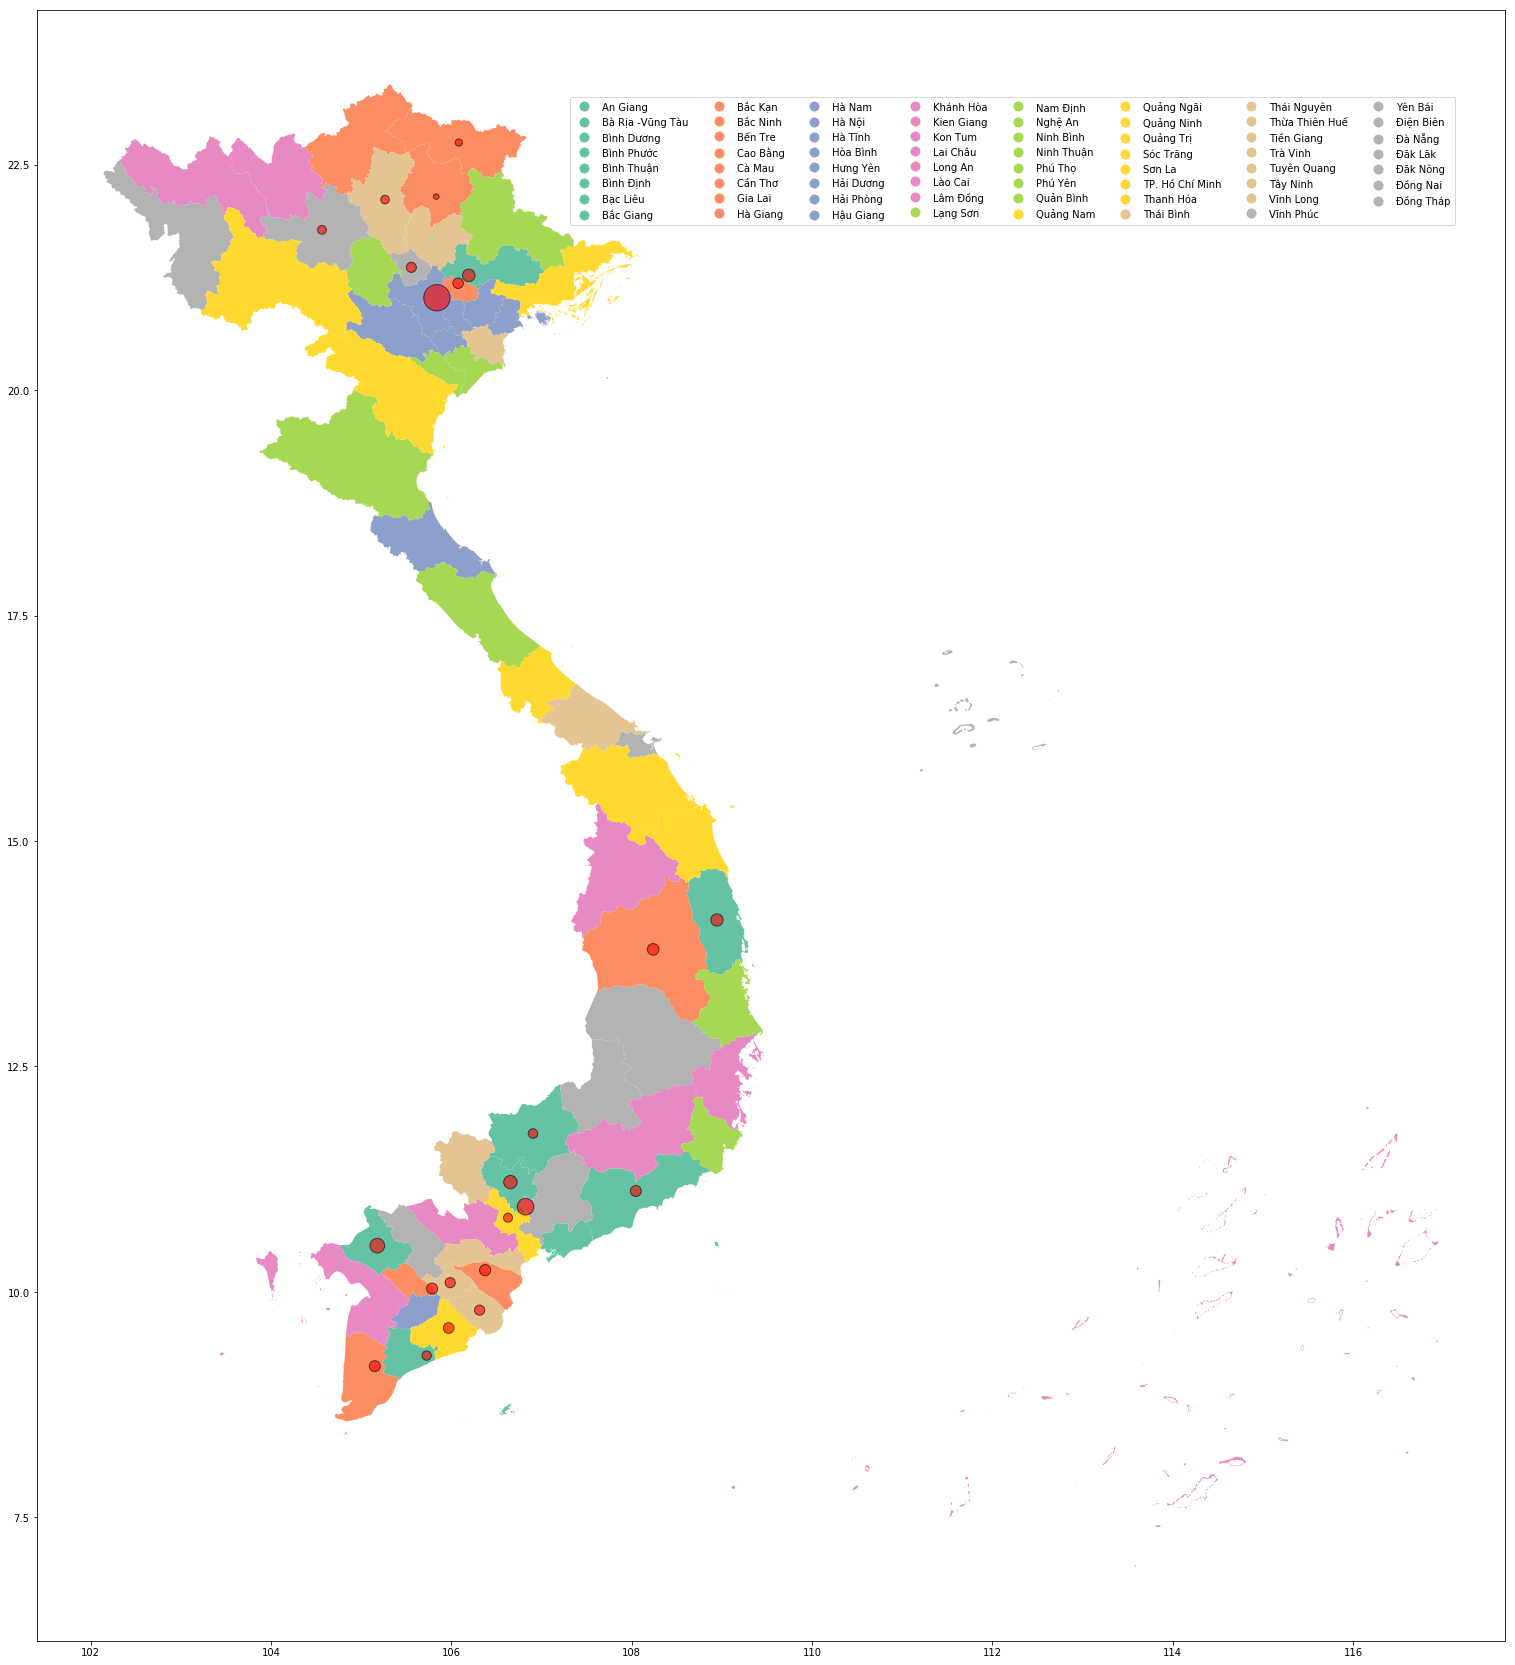

In [11]:
provinces.plot(column = 'ten_tinh', cmap = 'Set2', figsize=(30,30), legend=True, 
               legend_kwds={'bbox_to_anchor':(0.36, 0.95),'fontsize':10,'frameon':True,'ncol':8})
plt.scatter(data.long, data.lat, s=data['pop']/10, alpha=0.6, edgecolor='black', c='r')
plt.show()

In [10]:
df = pd.merge(provinces, data[['province','pop']], left_on='ten_tinh', right_on='province')

In [11]:
df.shape

(54, 6)

In [12]:
df.head()

,gid,code,ten_tinh,geometry,province,pop
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...",An Giang,2155.3
1,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...",Bắc Giang,1593.2
2,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.7442 22.73519, 105.74624 2...",Bắc Kạn,303.1
3,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...",Bạc Liêu,876.8
4,6,AD01,Bắc Ninh,"MULTIPOLYGON (((106.03246 21.22488, 106.03217 ...",Bắc Ninh,1114.0


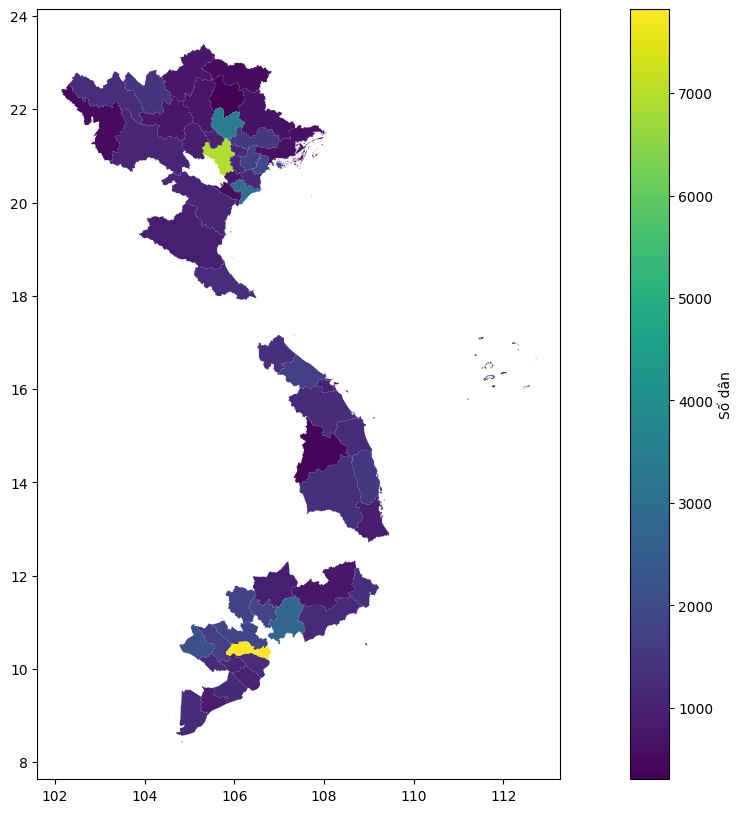

In [13]:
df.plot(column="pop", figsize=(18,10), legend=True, legend_kwds={"label":"Số dân"})
plt.show()